In [1]:
import numpy as np
from jax import numpy as jax_np
from jax import vmap as jax_vmap
from jax import grad as jax_grad
from jax import jit as jax_jit
from jax import random as jax_ran
from jax.experimental import stax,optimizers
from jax.experimental.stax import Dense, Relu

In [2]:
pip install cvnn

     |████████████████████████████████| 83 kB 1.3 MB/s eta 0:00:01
  Created wheel for cvnn: filename=cvnn-1.1.46-py2.py3-none-any.whl size=73147 sha256=1708ccb06a2edc8cadb54e0d6f10a15251bd4bbc82e45683fdbdf4327cea2b14
  Stored in directory: /Users/ky266509/Library/Caches/pip/wheels/0a/c2/38/dc644581b2dc2509d2542ef328aacfc35d9d401050d55e7119
Successfully built cvnn
Note: you may need to restart the kernel to use updated packages.


# Load data

In [2]:
dataset=np.load('data_ML_Nfreq100_Nbeta20_Nlambda20.npz',allow_pickle=True)
print(dataset.files)

['data', 'freq', 'params']


In [3]:
S= dataset['data']
Fr= dataset['freq']
parametre= dataset['params']



### For pre_processing we are going to use $S$ and $parametre$

#  I. Using $S$ for pre_processing

In [4]:
S=np.copy(S)
parametre=np.copy(parametre)

In [5]:
S.shape

(40000, 256, 3)

In [6]:
S=S[0:400,:,:]

In [7]:
S.shape

(400, 256, 3)

In [8]:
S

array([[[ 1.57502989e-26+6.94253168e-27j,
         -2.36671887e-27-1.64725180e-26j,
         -1.32160687e-26+9.60224977e-27j],
        [ 1.56673787e-26+7.13709609e-27j,
         -2.16459267e-27-1.65045372e-26j,
         -1.33361582e-26+9.44176278e-27j],
        [ 1.55844074e-26+7.33176966e-27j,
         -1.96233959e-27-1.65365682e-26j,
         -1.34563238e-26+9.28117913e-27j],
        ...,
        [ 1.60903190e-26+6.38328897e-27j,
         -2.99954320e-27-1.64634817e-26j,
         -1.29191754e-26+1.01467109e-26j],
        [ 1.60070751e-26+6.57899213e-27j,
         -2.79635469e-27-1.64958261e-26j,
         -1.30400102e-26+9.98542972e-27j],
        [ 1.59238547e-26+6.77462787e-27j,
         -2.59322233e-27-1.65281528e-26j,
         -1.31608118e-26+9.82419703e-27j]],

       [[ 1.09701593e-26+1.16306020e-26j,
          3.79906581e-27-1.50228879e-26j,
         -1.45838161e-26+3.43701333e-27j],
        [ 1.08334501e-26+1.17728946e-26j,
          3.98692953e-27-1.49852635e-26j,
         -1.

In [9]:
parameter=parametre[0:400,:]

In [10]:
parameter

array([[ 1.00000000e-22,  2.98000000e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -3.14159265e+00],
       [ 1.00000000e-22,  2.98000000e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.81089869e+00],
       [ 1.00000000e-22,  2.98000000e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.48020473e+00],
       ...,
       [ 1.00000000e-22,  2.98000000e-03,  0.00000000e+00, ...,
         0.00000000e+00,  1.57079633e+00,  2.48020473e+00],
       [ 1.00000000e-22,  2.98000000e-03,  0.00000000e+00, ...,
         0.00000000e+00,  1.57079633e+00,  2.81089869e+00],
       [ 1.00000000e-22,  2.98000000e-03,  0.00000000e+00, ...,
         0.00000000e+00,  1.57079633e+00,  3.14159265e+00]])

####  1. Normalisation

- $ \overline{S_i}=\frac{S_i}{\rVert S_i \lVert_2},\quad \forall i \in \overline{0,400}$

In [11]:
# cette fonction normalise seulement une forme d'onde pour un canal "X","Y","Z"
def normalize(S,n,e):
# n nombre de FO, e nombre de canal
    
    return np.asarray([S[n,i,e]/np.linalg.norm(S[n,:,e]) for i in range(S.shape[1])])

# return un tableau contenant chaque forme d'onde normalisée

In [12]:
S1=normalize(S,10,0)
S1

array([-0.0044968 -4.06161173e-04j, -0.00448933-4.61141195e-04j,
       -0.00448187-5.16078819e-04j, -0.00447441-5.70990629e-04j,
       -0.00446695-6.25893173e-04j, -0.00445949-6.80802991e-04j,
       -0.00445202-7.35736623e-04j, -0.00444455-7.90710645e-04j,
       -0.00443706-8.45741672e-04j, -0.00442957-9.00846397e-04j,
       -0.00442206-9.56041587e-04j, -0.00441453-1.01134413e-03j,
       -0.00440699-1.06677104e-03j, -0.00439943-1.12233947e-03j,
       -0.00439184-1.17806675e-03j, -0.00438422-1.23397043e-03j,
       -0.00437658-1.29006823e-03j, -0.0043689 -1.34637814e-03j,
       -0.0043612 -1.40291842e-03j, -0.00435345-1.45970758e-03j,
       -0.00434566-1.51676448e-03j, -0.00433784-1.57410830e-03j,
       -0.00432997-1.63175859e-03j, -0.00432205-1.68973530e-03j,
       -0.00431408-1.74805879e-03j, -0.00430605-1.80674987e-03j,
       -0.00429797-1.86582986e-03j, -0.00428983-1.92532057e-03j,
       -0.00428163-1.98524438e-03j, -0.00427335-2.04562424e-03j,
       -0.00426501-2.1064

In [13]:
# cette fonction rassemble toutes les formes d'onde normalisée dans un seul tableau 
# n nombre de forme d'onde , e numéro du  canal ("X","Y","Z")
def norm(S):
    
    return (np.asarray([[normalize(S,n,e) for e in range (3)] for n in range(400)])).reshape((-1,256,3))
# pour les n=400 premières formes d'ondes

In [14]:
S_bar=norm(S)
S_bar[0,:]

array([[ 4.08759846e-03+1.80176148e-03j,  4.06607859e-03+1.85225583e-03j,
         4.04454545e-03+1.90277852e-03j],
       [ 4.02299257e-03+1.95334482e-03j,  4.00141347e-03+2.00397006e-03j,
         3.97980161e-03+2.05466965e-03j],
       [ 3.95815042e-03+2.10545908e-03j,  3.93645331e-03+2.15635395e-03j,
         3.91470360e-03+2.20736999e-03j],
       [ 3.89289457e-03+2.25852307e-03j,  3.87101941e-03+2.30982923e-03j,
         3.84907124e-03+2.36130471e-03j],
       [ 3.82704311e-03+2.41296595e-03j,  3.80492794e-03+2.46482960e-03j,
         3.78271855e-03+2.51691260e-03j],
       [ 3.76040767e-03+2.56923214e-03j,  3.73798786e-03+2.62180572e-03j,
         3.71545160e-03+2.67465115e-03j],
       [ 3.69279116e-03+2.72778661e-03j,  3.66999870e-03+2.78123063e-03j,
         3.64706618e-03+2.83500217e-03j],
       [ 3.62398541e-03+2.88912059e-03j,  3.60074798e-03+2.94360575e-03j,
         3.57734528e-03+2.99847796e-03j],
       [ 3.55376848e-03+3.05375808e-03j,  3.53000853e-03+3.10946753e-03j

In [15]:
S_bar.shape

(400, 256, 3)

####  2. Génération de v.a uniforme 

- $ \tilde{S_{i,k}}= \mathrm{X}_k \times \overline{S_i},\quad \forall i \in [0,1,...,400] ,\quad k \in \overline{0,5}\quad avec \quad \mathrm{X}_k \to \cup(1,10)$

In [16]:
nb_fo=400 # nombre de FO utilisable pour l'apprentissage du réseau de neurones (400)
X=[np.random.uniform(1,10,5) for _ in range(nb_fo)]
X[10]

array([1.91998474, 3.17217849, 1.96625065, 9.59205118, 3.54061119])

In [17]:
# multiplication de X par chaque FO
def amplitude(S,n):
    
    return np.asarray([S[n,:,:]*i for i in X[n]])

In [18]:
# cette fonction retourne les 5 amplitudes différentes de chaque FO
def amp(S):
     
    return (np.asarray([amplitude(S,n) for n in range(nb_fo)])).reshape((-1,5,256,3))
# chaque FO retourne 5 sous formes d'onde d'amplitude différentes chacune ayant 2827 fréquences 





In [19]:
S_tilde=amp(S_bar)

In [20]:
S_tilde.shape

(400, 5, 256, 3)

#  II. Using $parametre $ for pre_processing

#### 1.Parameters used for learning

-  Amplitude $h_0$
-  Latitude Ecliptic $\beta$
-  Ecliptic Longitude $\lambda$

In [21]:
amplitude=parametre[:,0] # amplitude
beta=parametre[:,6] # bêta
lamb=parametre[:,7] # lambda
#parameters=[]
#zz=np.concatenate((amplitude[0:2],beta[0:2]))
parameters=np.asarray([(i,j,k)for i,j,k in zip(amplitude,beta,lamb)] )

parameters.shape



(40000, 3)

-  $ \overline{h}=[h_i]=\frac{h_0}{\rVert S_i \lVert_2},\forall i \quad\text{allant de 0 à nb_fo}$

 -  $\tilde{h}=[h_i]\times\mathrm{X}_j ,\forall i \in  \overline{0,nb}\quad et\quad j \in\overline{0,5}\quad avec \quad  \mathrm{X} \to \cup(1,10) $

$$
 \forall i \in [1,2,..400],\begin{array}{|c|c|c|c|c|}
\hline
\beta & \lambda & \overline{h} & \tilde{h}\\
\hline
\beta_i & \lambda_i & \text{cte} & \text{cte1}\\
\hline
\beta_i & \lambda_i & \text{cte} & \text{cte2}\\
\hline
\beta_i & \lambda_i & \text{cte} & \text{cte3}\\
\hline
\beta_i & \lambda_i & \text{cte} & \text{cte4}\\
\hline
\beta_i & \lambda_i & \text{cte} & \text{cte5}\\
\hline
\end{array}
$$




In [22]:
def ParametersAmpli(S,c): # c canal utilisé
    h_bar=[parameters[i,0]/np.linalg.norm(S[i,:,c]) for i in range(nb_fo)]
    h_tilde=np.asarray([[h_bar[j]*i for i in X[j]]for j in range(nb_fo)])
    lam=np.array([[u]*5 for u in lamb ])
    bet=np.array([[v]*5 for v in beta])
    return h_tilde,bet,lam



In [23]:
h_tilde,bet,lam=ParametersAmpli(S,0) # une question à posé ici : jerôme

In [24]:
final_params=np.asarray([[(i,j,k)for i,j,k in zip(h_tilde[n,:],bet[n,:],lam[n,:])] for n in range(nb_fo)])
final_params

array([[[133.67691218,   0.        ,  -3.14159265],
        [ 99.01781852,   0.        ,  -3.14159265],
        [ 45.75104324,   0.        ,  -3.14159265],
        [256.00009364,   0.        ,  -3.14159265],
        [ 77.43121099,   0.        ,  -3.14159265]],

       [[150.04752864,   0.        ,  -2.81089869],
        [ 89.28189314,   0.        ,  -2.81089869],
        [210.27562539,   0.        ,  -2.81089869],
        [173.28440829,   0.        ,  -2.81089869],
        [ 31.72895433,   0.        ,  -2.81089869]],

       [[109.93190013,   0.        ,  -2.48020473],
        [160.18835694,   0.        ,  -2.48020473],
        [153.23838969,   0.        ,  -2.48020473],
        [123.77502395,   0.        ,  -2.48020473],
        [208.95153423,   0.        ,  -2.48020473]],

       ...,

       [[105.75200799,   1.57079633,   2.48020473],
        [269.41569324,   1.57079633,   2.48020473],
        [ 50.99486871,   1.57079633,   2.48020473],
        [158.17440002,   1.57079633,   2.4802

# III. Architecture réseau

In [25]:
S_tilde=np.reshape(S_tilde,(-1,256,3))

In [26]:
S_canalXYZ=S_tilde

In [27]:
S_canalXYZ.shape

(2000, 256, 3)

In [28]:
final_params=np.reshape(final_params,(-1,3))

In [29]:
final_params.shape

(2000, 3)

In [30]:
final_params

array([[133.67691218,   0.        ,  -3.14159265],
       [ 99.01781852,   0.        ,  -3.14159265],
       [ 45.75104324,   0.        ,  -3.14159265],
       ...,
       [223.22868329,   1.57079633,   3.14159265],
       [133.48078911,   1.57079633,   3.14159265],
       [ 36.53277587,   1.57079633,   3.14159265]])

###### This function allows to put on the same scale our parameters (Target)

In [31]:
def paraTr(param):
    n=3
    h,beta,lambd =[],[],[]
    for i in range(n):
        for j in range(len(param)):
            if i==0:
                H=(param[j,i]-np.mean(param[:,i]))/np.std(param[:,i])
                h.append(H)
            elif i==1:
                Beta=(param[j,i]-np.mean(param[:,i]))/np.std(param[:,i])
                beta.append(Beta)
            
            else:
                
                Lambd=(param[j,i]-np.mean(param[:,i]))/np.std(param[:,i])
                lambd.append(Lambd)
                                                              
                                                              
    return h,beta,lambd


In [32]:
h,b,l=paraTr(final_params)

In [33]:
l[0:4]

[-1.647508942095828,
 -1.647508942095828,
 -1.647508942095828,
 -1.647508942095828]

In [34]:
h[0:4]

[-0.15904234707314244,
 -0.6708596609648785,
 -1.4574600873317454,
 1.6473269361569753]

In [35]:
b[0:4]

[-1.4015633533769243,
 -1.4015633533769243,
 -1.4015633533769243,
 -1.4015633533769243]

In [36]:
par=np.asarray([(i,j,k)for i,j,k in zip(h,b,l)])

In [37]:
par

array([[-0.15904235, -1.40156335, -1.64750894],
       [-0.67085966, -1.40156335, -1.64750894],
       [-1.45746009, -1.40156335, -1.64750894],
       ...,
       [ 1.16338539,  2.36385651,  1.64750894],
       [-0.16193853,  2.36385651,  1.64750894],
       [-1.59358796,  2.36385651,  1.64750894]])

#### 1. Split data

In [38]:
# we can use par or final_data to do the splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(S_canalXYZ,par,test_size=0.20,random_state=42)

In [39]:
X_train.shape

(1600, 256, 3)

In [40]:
X_train[0,0,:]

array([-0.00389558+5.34167970e-05j, -0.00389061+5.71632615e-06j,
       -0.00388566-4.18612937e-05j])

In [41]:
X_trainR=np.real(X_train[:,:,:]) # 1600 échantillons 
X_trainI=np.imag(X_train[:,:,:])# 1600 échantillons 
X_Tr=np.concatenate((X_trainR,X_trainI),axis=2)



In [42]:
X_testR=np.real(X_test[:,:,:]) # 400 échantillons 
X_testI=np.imag(X_test[:,:,:])# 400 échantillons 
X_Te=np.concatenate((X_testR,X_testI),axis=2)

X_Te.shape

(400, 256, 6)

In [43]:
Y_test.shape

(400, 3)

In [44]:
X_Tr

array([[[-3.89557575e-03, -3.89061001e-03, -3.88566011e-03,
          5.34167970e-05,  5.71632615e-06, -4.18612937e-05],
        [-3.88072447e-03, -3.87580151e-03, -3.87088971e-03,
         -8.93308266e-05, -1.36706901e-04, -1.84004025e-04],
        [-3.86598751e-03, -3.86109339e-03, -3.85620585e-03,
         -2.31236616e-04, -2.78419012e-04, -3.25565486e-04],
        ...,
        [ 1.06814507e-03,  1.05961453e-03,  1.05114604e-03,
          3.82248587e-04,  3.93739425e-04,  4.05151335e-04],
        [ 1.04273643e-03,  1.03438262e-03,  1.02608160e-03,
          4.16488490e-04,  4.27754948e-04,  4.38954685e-04],
        [ 1.01783044e-03,  1.00962625e-03,  1.00146623e-03,
          4.50091589e-04,  4.61169465e-04,  4.72192044e-04]],

       [[-8.74026515e-03, -8.96795823e-03, -9.19589225e-03,
          1.83968815e-02,  1.82962891e-02,  1.81956227e-02],
        [-9.42413623e-03, -9.65275952e-03, -9.88183196e-03,
          1.80948516e-02,  1.79939447e-02,  1.78928710e-02],
        [-1.01114

In [45]:
X_Tr.shape

(1600, 256, 6)

In [46]:
Y_train.shape

(1600, 3)

# III. Building Network

#### Initialisation des paramètres du réseau

- Les paramètres du réseau sont spécifiés par une liste python de longueur $N_{\rm layers}$.
- Chaque élément de la liste est un tuple à deux éléments stokant les paramètres des $n_{\rm i}$ neurones de la couche $i^{\rm th}$.
  - Le premier élément de tuple donne des valeurs de paramètres sur les poids $w_{\rm i,i-1}$ , stockés comme un ndarray de la forme ($n_{\rm i}$,$n_{\rm i-1}$).
  - Le deuxième élément de tuple donne des valeurs de paramètres sur les biais $b_{\rm i}$, stokés comme un ndarray de la forme ($n_{\rm i}$, ).

##### 1.  Hyperparamètres 

In [47]:
from jax.nn.initializers import glorot_normal,normal
def initialize_network_layer(sizes, key):
    """ Initialize the weights of all layers of a linear layer network """
    keys=jax_ran.split(key,len(sizes))
    # Initialize a single layer with Gaussian weights -  helper function
    def initialize_network_params(m, n,key):
        w_key,b_key=jax_ran.split(key)
        w_init=glorot_normal()
        b_init=normal()
        if (m==sizes[0]).any():
            ran_weigths=w_init(w_key,(n[0,0],n[0,0],m.shape[0],m.shape[1]))
            ran_biases=b_init(b_key,(n[0,0],n[0,0]))
        elif n==sizes[-1]:
        
            ran_weigths=w_init(w_key,(n,m[0,0],m[0,0]))
            ran_biases=b_init(b_key,(n,))
        else:
            ran_weigths=w_init(w_key,(n[0,0],n[0,0],m[0,0],m[0,0]))
            ran_biases=b_init(b_key,(n[0,0],n[0,0]))
        return ran_weigths,ran_biases
    
    return [initialize_network_params(m, n, k) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]



In [48]:
X_Tr[0,:,:].shape

(256, 6)

####  2.Construction du réseau de neurone

In [49]:
def network_layer_sizes(n_features,n_targets,n_layers,n_neurons_per_layer):
    dense_layer_sizes=[np.asarray(n_neurons_per_layer).reshape(-1,1)]*n_layers
    layer_sizes=[n_features,*dense_layer_sizes,n_targets]
    return layer_sizes



key=jax_ran.PRNGKey(0)
num_features, num_targets =X_Tr[0,:,:], 3          
num_layers, num_neurons_per_layer = 3, 10   # MLP à 3  couches cachées (10 units )

layer_sizes =network_layer_sizes(
    num_features, num_targets, num_layers, num_neurons_per_layer)

# Return a list of tuples of layer weights
params=initialize_network_layer(layer_sizes,key)
layer_sizes

[array([[-3.89557575e-03, -3.89061001e-03, -3.88566011e-03,
          5.34167970e-05,  5.71632615e-06, -4.18612937e-05],
        [-3.88072447e-03, -3.87580151e-03, -3.87088971e-03,
         -8.93308266e-05, -1.36706901e-04, -1.84004025e-04],
        [-3.86598751e-03, -3.86109339e-03, -3.85620585e-03,
         -2.31236616e-04, -2.78419012e-04, -3.25565486e-04],
        ...,
        [ 1.06814507e-03,  1.05961453e-03,  1.05114604e-03,
          3.82248587e-04,  3.93739425e-04,  4.05151335e-04],
        [ 1.04273643e-03,  1.03438262e-03,  1.02608160e-03,
          4.16488490e-04,  4.27754948e-04,  4.38954685e-04],
        [ 1.01783044e-03,  1.00962625e-03,  1.00146623e-03,
          4.50091589e-04,  4.61169465e-04,  4.72192044e-04]]),
 array([[10]]),
 array([[10]]),
 array([[10]]),
 3]

In [50]:
params

[(DeviceArray([[[[-1.06745828e-02,  1.00688566e-03,  1.90657508e-02,
                  -4.33682930e-03, -7.99626019e-03,  8.96459259e-03],
                 [ 3.81213235e-04,  8.53124168e-03,  3.06183496e-03,
                  -1.04510756e-02, -1.51651411e-03,  1.35899717e-02],
                 [ 9.85263847e-03,  8.36720131e-03,  3.41531588e-03,
                   9.21165571e-03, -1.37549415e-02,  8.75881815e-04],
                 ...,
                 [ 1.04341647e-02, -1.66429486e-02,  4.64828592e-03,
                  -4.45930799e-03, -8.41969252e-03,  1.21607259e-02],
                 [-3.64537374e-03,  7.96949584e-03, -9.94619820e-03,
                  -1.42408358e-02, -1.44863487e-04, -6.06406247e-03],
                 [ 7.63598969e-03,  9.65618808e-03,  1.03205424e-02,
                  -6.81126956e-03, -1.89822596e-02,  2.77542789e-03]],
  
                [[ 2.31428491e-03,  7.09828967e-03, -1.05132423e-02,
                  -2.57627480e-03, -6.54767780e-03, -1.25545473e-03],
 

In [51]:
len(params)

4

In [52]:
for w,b in params[:-1]:
    print(w.shape,b.shape)

(10, 10, 256, 6) (10, 10)
(10, 10, 10, 10) (10, 10)
(10, 10, 10, 10) (10, 10)


In [53]:
w,b = params[0]
print(w.shape,b.shape)

(10, 10, 256, 6) (10, 10)


In [54]:
w,b = params[-1]
print(w.shape,b.shape)

(3, 10, 10) (3,)


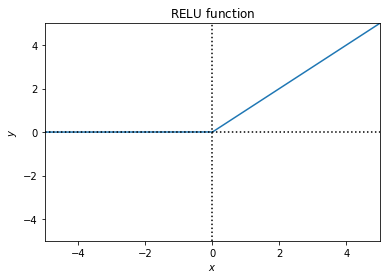

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from jax.nn import relu

fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(-5, 5)
ylim = ax.set_ylim(-5, 5)
_x = np.linspace(-5, 5, 1000)
__=ax.plot(_x, relu(_x))
xlabel = ax.set_xlabel(r'$x$')
ylabel = ax.set_ylabel(r'$y$')
title = ax.set_title(r'${\rm RELU\ function}$')
__=ax.plot(_x, np.zeros_like(_x), ':', color='k')
__=ax.plot(np.zeros_like(_x), _x, ':', color='k')

#### 3. Feedforward function 

In [56]:
def predict(params,in_array):
    """ Chaque neurone est appliqué à la fonction d'activation y=w*x+b,
     seulement la dernière couche (couche de sortie) qui n'utilise pas de cette fonction d'activation (régression) 
     utilisation de la fonction identité
     
     Paramètres de la fonction:
     --------------------------------
       params: list de tuple 
            paramètre du réseau , avec une liste d'élément par couche (w,b)
       in_array: ndarray 
            shape de la forme (batch_size, n_features)
    
     Returns
     -------------------------------
        preds: ndarray
             ndarray dont le shape est (batch_size, n_targets)
     
     """
    
    activations = in_array
    
    # Boucle itérative sur chaque couche dense exceptée la dernière
    
    for w, b in params[:-1]:
        outputs = jax_np.einsum('mjt,ikjt ->mik',activations,w)+b[np.newaxis,:,:]  # Application de la transformation linéaire
        activations = relu(outputs)  #  apply nonlinear activation
        
    #  Now for the final layer
    w_final, b_final = params[-1] 
    final_outputs = jax_np.einsum('mik,sik ->ms',activations,w_final) + b_final[np.newaxis,:] 
    return final_outputs  # Final layer is just w*x + b with no activation

In [57]:
pred=predict(params,X_Tr)

In [58]:
pred[:,0]

DeviceArray([0.01888044, 0.01553811, 0.01598214, ..., 0.01758513,
             0.01554204, 0.03895811], dtype=float32)

#### Vectorisation des prédictions du réseau avec vmap

- La fonction feedforward_prediction n'accepte que les arguments scalaires. Le vectoriser avec vmap simplifiera l'apprentissage par lots( batch-training) du réseau , plutôt que l'entrainement avec un point de données à la fois.

In [56]:
batched_predict=jax_vmap(predict, in_axes=[0, None])

#### 4. Utility and loss function

- loss function

In [76]:
def mse_loss(params, in_array, targets):
    pred = predict(params,in_array)
    diff_Ampli = [(pred[i,0]-targets[i,0])**2/pred.shape[0] for i in range(pred.shape[0])]
    diff_Beta = [(pred[j,1]-targets[j,1])**2/pred.shape[0] for j in range(pred.shape[0])]
    diff_lambda = [(pred[k,2]-targets[k,2])**2/pred.shape[0] for k in range(pred.shape[0])]
    error=sum(diff_Ampli) +sum(diff_Beta)+sum(diff_lambda)
    return error

In [60]:
mse_loss(params, X_Tr, Y_train)

DeviceArray(2.9921165, dtype=float32)

- Metric used for performance 

In [173]:
accuracy(params,X_Tr,Y_train)

([0.0], [0.0], [0.0])

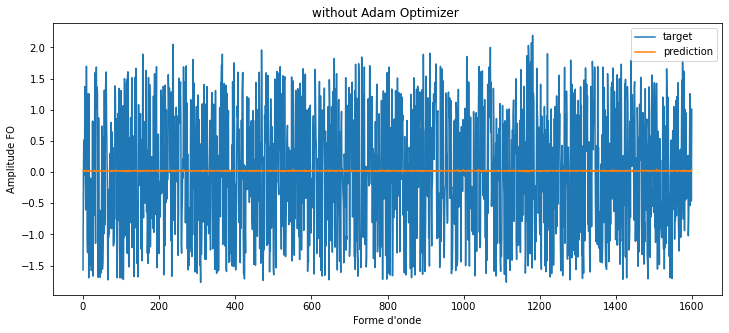

In [61]:
plt.figure(figsize=(12,5))
plt.plot(Y_train[:,0],label='target')
plt.plot(pred[:,0],label='prediction')
plt.ylabel('Amplitude FO')
plt.xlabel("Forme d'onde")
plt.title('without Adam Optimizer ')
plt.legend()

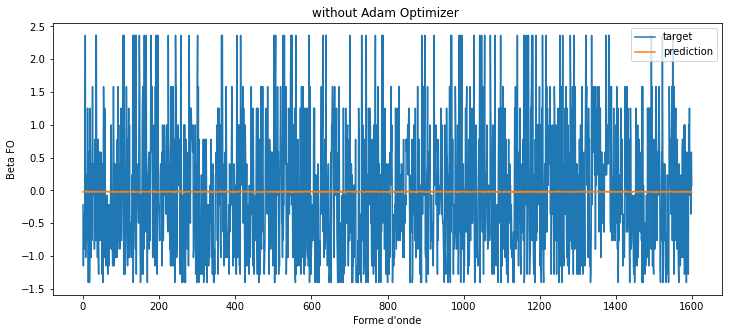

In [62]:
plt.figure(figsize=(12,5))
plt.plot(Y_train[:,1],label='target')
plt.plot(pred[:,1],label='prediction')
plt.ylabel('Beta FO')
plt.xlabel("Forme d'onde")
plt.title('without Adam Optimizer ')
plt.legend()

- Backpropagation 

In [63]:

# Defining an optimizer in Jax
learning_rate= 1e-3
opt_init, opt_update, get_params = optimizers.adam(learning_rate)
opt_state = opt_init(params) # init avce les paramètre du réseau

# Define a compiled update step
@jax_jit
def update(i, opt_state, x, y):
    p = get_params(opt_state)
    g = jax_grad(mse_loss)(p, x, y)
    loss=mse_loss(p,x,y)
    return opt_update(i, g, opt_state),loss





In [64]:
l=[]
# Adam optimisation 
for i in range(100):
    opt_state ,loss = update(i, opt_state, X_Tr, Y_train)
   # print(" epoch:{0},loss={1}".format(i,loss))
    l.append(loss)
net_params = get_params(opt_state)

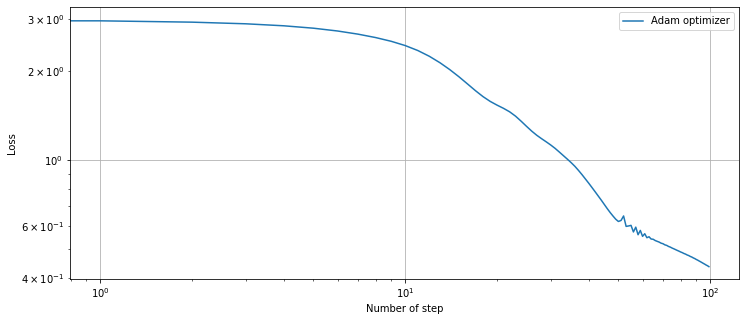

In [65]:
plt.figure(figsize=(12,5))
x=np.arange(100)
plt.loglog(l,label='Adam optimizer')
plt.xlabel('Number of step')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [66]:
pred_Adam=predict(net_params,X_Tr)

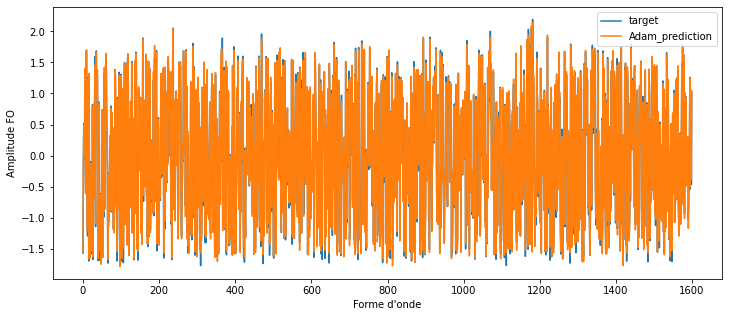

In [67]:
plt.figure(figsize=(12,5))
plt.plot(Y_train[:,0],label='target')
plt.plot(pred_Adam[:,0],label='Adam_prediction')
plt.ylabel('Amplitude FO')
plt.xlabel("Forme d'onde")
plt.legend()

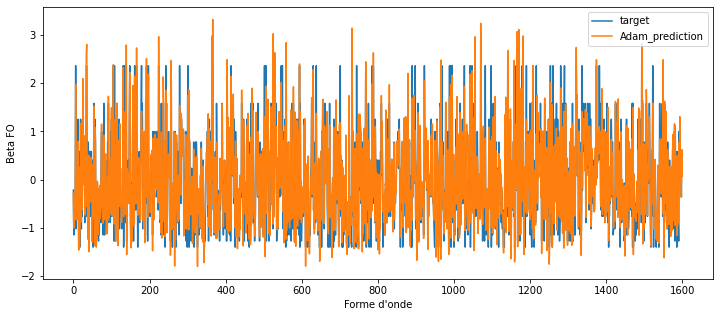

In [68]:
plt.figure(figsize=(12,5))
plt.plot(Y_train[:,1],label='target')
plt.plot(pred_Adam[:,1],label='Adam_prediction')
plt.ylabel('Beta FO')
plt.xlabel("Forme d'onde")
plt.legend()

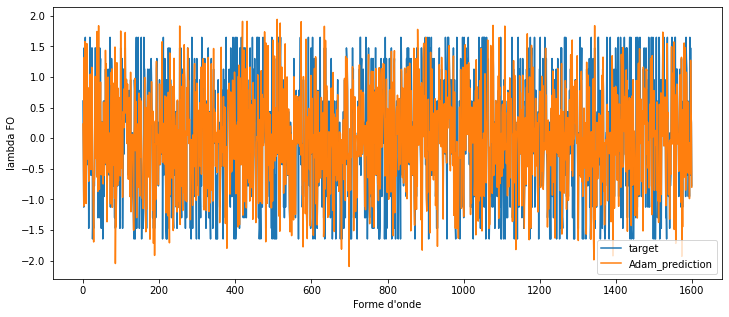

In [70]:
plt.figure(figsize=(12,5))
plt.plot(Y_train[:,2],label='target')
plt.plot(pred_Adam[:,2],label='Adam_prediction')
plt.ylabel('lambda FO')
plt.xlabel("Forme d'onde")
plt.legend()

In [64]:
Y_train[:,0]

array([136.36320344, 110.16192236, 146.44022436, ..., 128.69728056,
       207.09427956,  42.88538551])

### Evaluation du modèle

In [71]:
Y_test

array([[ 0.58853095,  1.5826692 ,  0.43355498],
       [ 1.34403479, -1.02147684,  0.086711  ],
       [-0.73186077,  0.40473161, -0.60697698],
       ...,
       [ 1.98753303,  1.25408887, -0.43355498],
       [ 1.20385509, -1.14876443,  0.43355498],
       [-1.13258808, -0.76321912, -0.43355498]])

In [72]:
predT=predict(params,X_Te)

In [77]:
mse_loss(params, X_Te, Y_test)

DeviceArray(3.032177, dtype=float32)

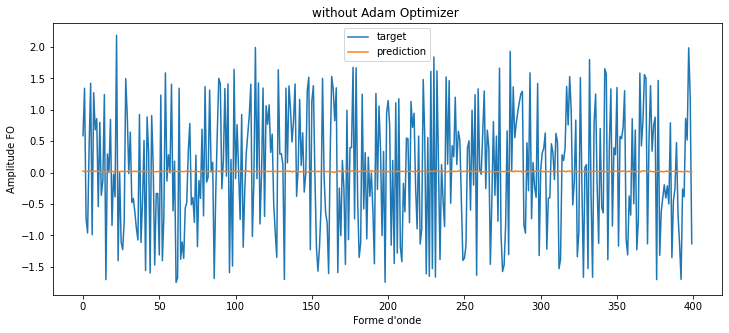

In [78]:
plt.figure(figsize=(12,5))
plt.plot(Y_test[:,0],label='target')
plt.plot(predT[:,0],label='prediction')
plt.ylabel('Amplitude FO')
plt.xlabel("Forme d'onde")
plt.title('without Adam Optimizer ')
plt.legend()

In [79]:
predT[:,0]

DeviceArray([0.02470752, 0.01402518, 0.0204336 , 0.01853133, 0.01828997,
             0.02663651, 0.01828401, 0.02429479, 0.021169  , 0.01973649,
             0.02115099, 0.01546706, 0.01668165, 0.02128515, 0.00846831,
             0.01778156, 0.01661206, 0.01939925, 0.02023079, 0.01604806,
             0.01549469, 0.01899984, 0.02814849, 0.01954877, 0.01569475,
             0.01930544, 0.01984071, 0.01660728, 0.0161593 , 0.01977064,
             0.02223301, 0.02152533, 0.01552641, 0.0188882 , 0.02201729,
             0.01683686, 0.01801785, 0.01555735, 0.01994101, 0.01533642,
             0.02620441, 0.01838924, 0.0140709 , 0.01520238, 0.01715998,
             0.02266699, 0.01971566, 0.01579369, 0.01285156, 0.01823181,
             0.01855787, 0.01826271, 0.01686809, 0.02258875, 0.02069366,
             0.0148003 , 0.02024013, 0.0185465 , 0.0271993 , 0.01795286,
             0.02167874, 0.01778559, 0.01631834, 0.01582539, 0.01931464,
             0.01577049, 0.01595793, 0.01968978, 0.

In [80]:
l=[]
# Adam optimisation 
for i in range(100):
    opt_state ,loss = update(i, opt_state, X_Te, Y_test)
   # print(" epoch:{0},loss={1}".format(i,loss))
    l.append(loss)
net_params = get_params(opt_state)

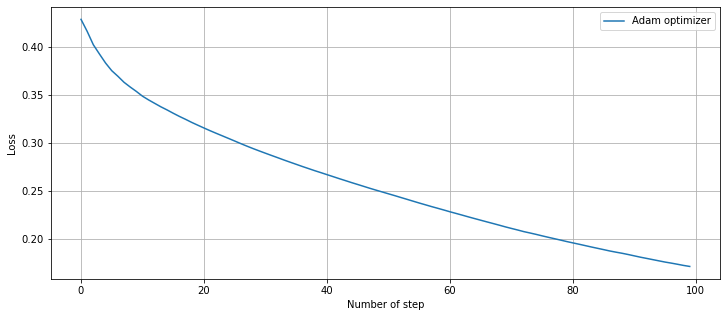

In [82]:
plt.figure(figsize=(12,5))
x=np.arange(100)
plt.plot(l,label='Adam optimizer')
plt.xlabel('Number of step')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [83]:
predT_Adam=predict(net_params,X_Te)

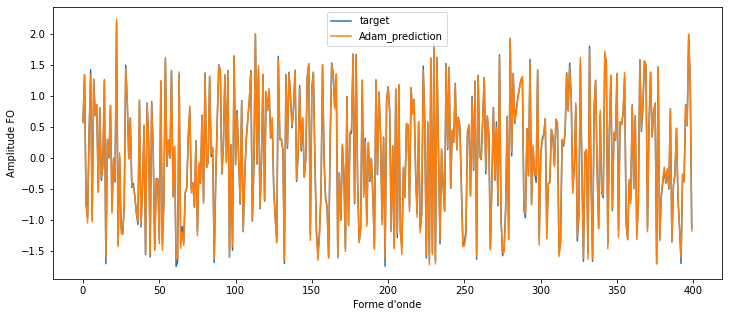

In [84]:
plt.figure(figsize=(12,5))
plt.plot(Y_test[:,0],label='target')
plt.plot(predT_Adam[:,0],label='Adam_prediction')
plt.ylabel('Amplitude FO')
plt.xlabel("Forme d'onde")
plt.legend()

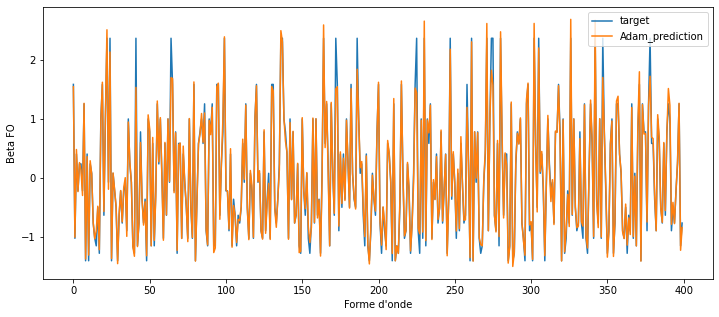

In [85]:
plt.figure(figsize=(12,5))
plt.plot(Y_test[:,1],label='target')
plt.plot(predT_Adam[:,1],label='Adam_prediction')
plt.ylabel('Beta FO')
plt.xlabel("Forme d'onde")
plt.legend()

In [86]:
def LOSS_Hist(params,in_array,targets):
    preds=predict(params,in_array)
    ampl_error = [(preds[i,0]-targets[i,0])**2/preds.shape[0] for i in range(preds.shape[0])]
    beta_error = [(preds[j,1]-targets[j,1])**2/preds.shape[0] for j in range(preds.shape[0])]
    lambda_error = [(preds[k,2]-targets[k,2])**2/preds.shape[0] for k in range(preds.shape[0])]
    return ampl_error,beta_error,lambda_error

In [87]:
a_err,b_err,l_err=LOSS_Hist(params,X_Tr,Y_train)

In [ ]:
L=np.arange(1600)
plt.hist(a_err,bins=L)

In [ ]:
num_epochs = 10

#### 4. Training Loop

In [ ]:
import time
num_epochs=10
for epoch in range(num_epochs):
    for i in range(0,1600,100):
        start_time=time.time()
        params=update(params,X_Tr,Y_train)
        loss=mse_loss(params,X_Tr,Y_train)
    epoch_time=time.time()-start_time
    tr_acc=accuracy(params,X_Tr,Y_train)
    te_acc = accuracy(params, X_Te, Y_test)
    
    print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
    print("Training set accuracy {}".format(tr_acc))
    print("Test set accuracy {}".format(te_acc))
    print("Train loss {}".format(loss))

Epoch 0 in 19.57 sec
Training set accuracy ([0.0], [0.0], [0.0])
Test set accuracy ([0.0], [0.0], [0.0])
Train loss nan
Epoch 1 in 16.33 sec
Training set accuracy ([0.0], [0.0], [0.0])
Test set accuracy ([0.0], [0.0], [0.0])
Train loss nan
Epoch 2 in 16.38 sec
Training set accuracy ([0.0], [0.0], [0.0])
Test set accuracy ([0.0], [0.0], [0.0])
Train loss nan
Epoch 3 in 16.45 sec
Training set accuracy ([0.0], [0.0], [0.0])
Test set accuracy ([0.0], [0.0], [0.0])
Train loss nan
Epoch 4 in 16.96 sec
Training set accuracy ([0.0], [0.0], [0.0])
Test set accuracy ([0.0], [0.0], [0.0])
Train loss nan
Epoch 5 in 74.84 sec
Training set accuracy ([0.0], [0.0], [0.0])
Test set accuracy ([0.0], [0.0], [0.0])
Train loss nan


In [ ]:

# Start looping over the passengers, i.e. over I.
num_epochs=10
for I in range(num_epochs): #loop in all the FO:
     # 2: Start the algorithm
         # Adam optimisation 
    for i in range(100):
        l=[]
        # 2.1: Backpropagate & Gradient descent (Adam )
        opt_state ,loss = update(i, opt_state, X_Tr,Y_train)
        l.append(loss)
        net_params = get_params(opt_state)
        # 2.2: Feed forward
        pred1=predict(params,X_Tr)
        # 2.3 Computation of the loss function
        loss=mse_loss(params,X_Tr,Y_train)


# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, X_Tr.shape[0]), l,label='loss')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()
